In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/Kittisak008B/Data-science-bootcamp9/main/SPRINT09%20%3A%20ML/BostonHousing.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
#The Boston Housing Dataset
# crim - per capita crime rate by town
# zn - proportion of residential land zoned for lots over 25,000 sq.ft.
# indus - proportion of non-retail business acres per town.
# chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# nox - nitric oxides concentration (parts per 10 million)
# rm - average number of rooms per dwelling
# age - proportion of owner-occupied units built prior to 1940
# dis - weighted distances to five Boston employment centres
# rad - index of accessibility to radial highways
# tax - full-value property-tax rate per $10,000
# ptratio - pupil-teacher ratio by town
# b - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# lstat - % lower status of the population
# medv - Median value of owner-occupied homes in $1000's

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%config InlineBackend.figure_format ='retina'

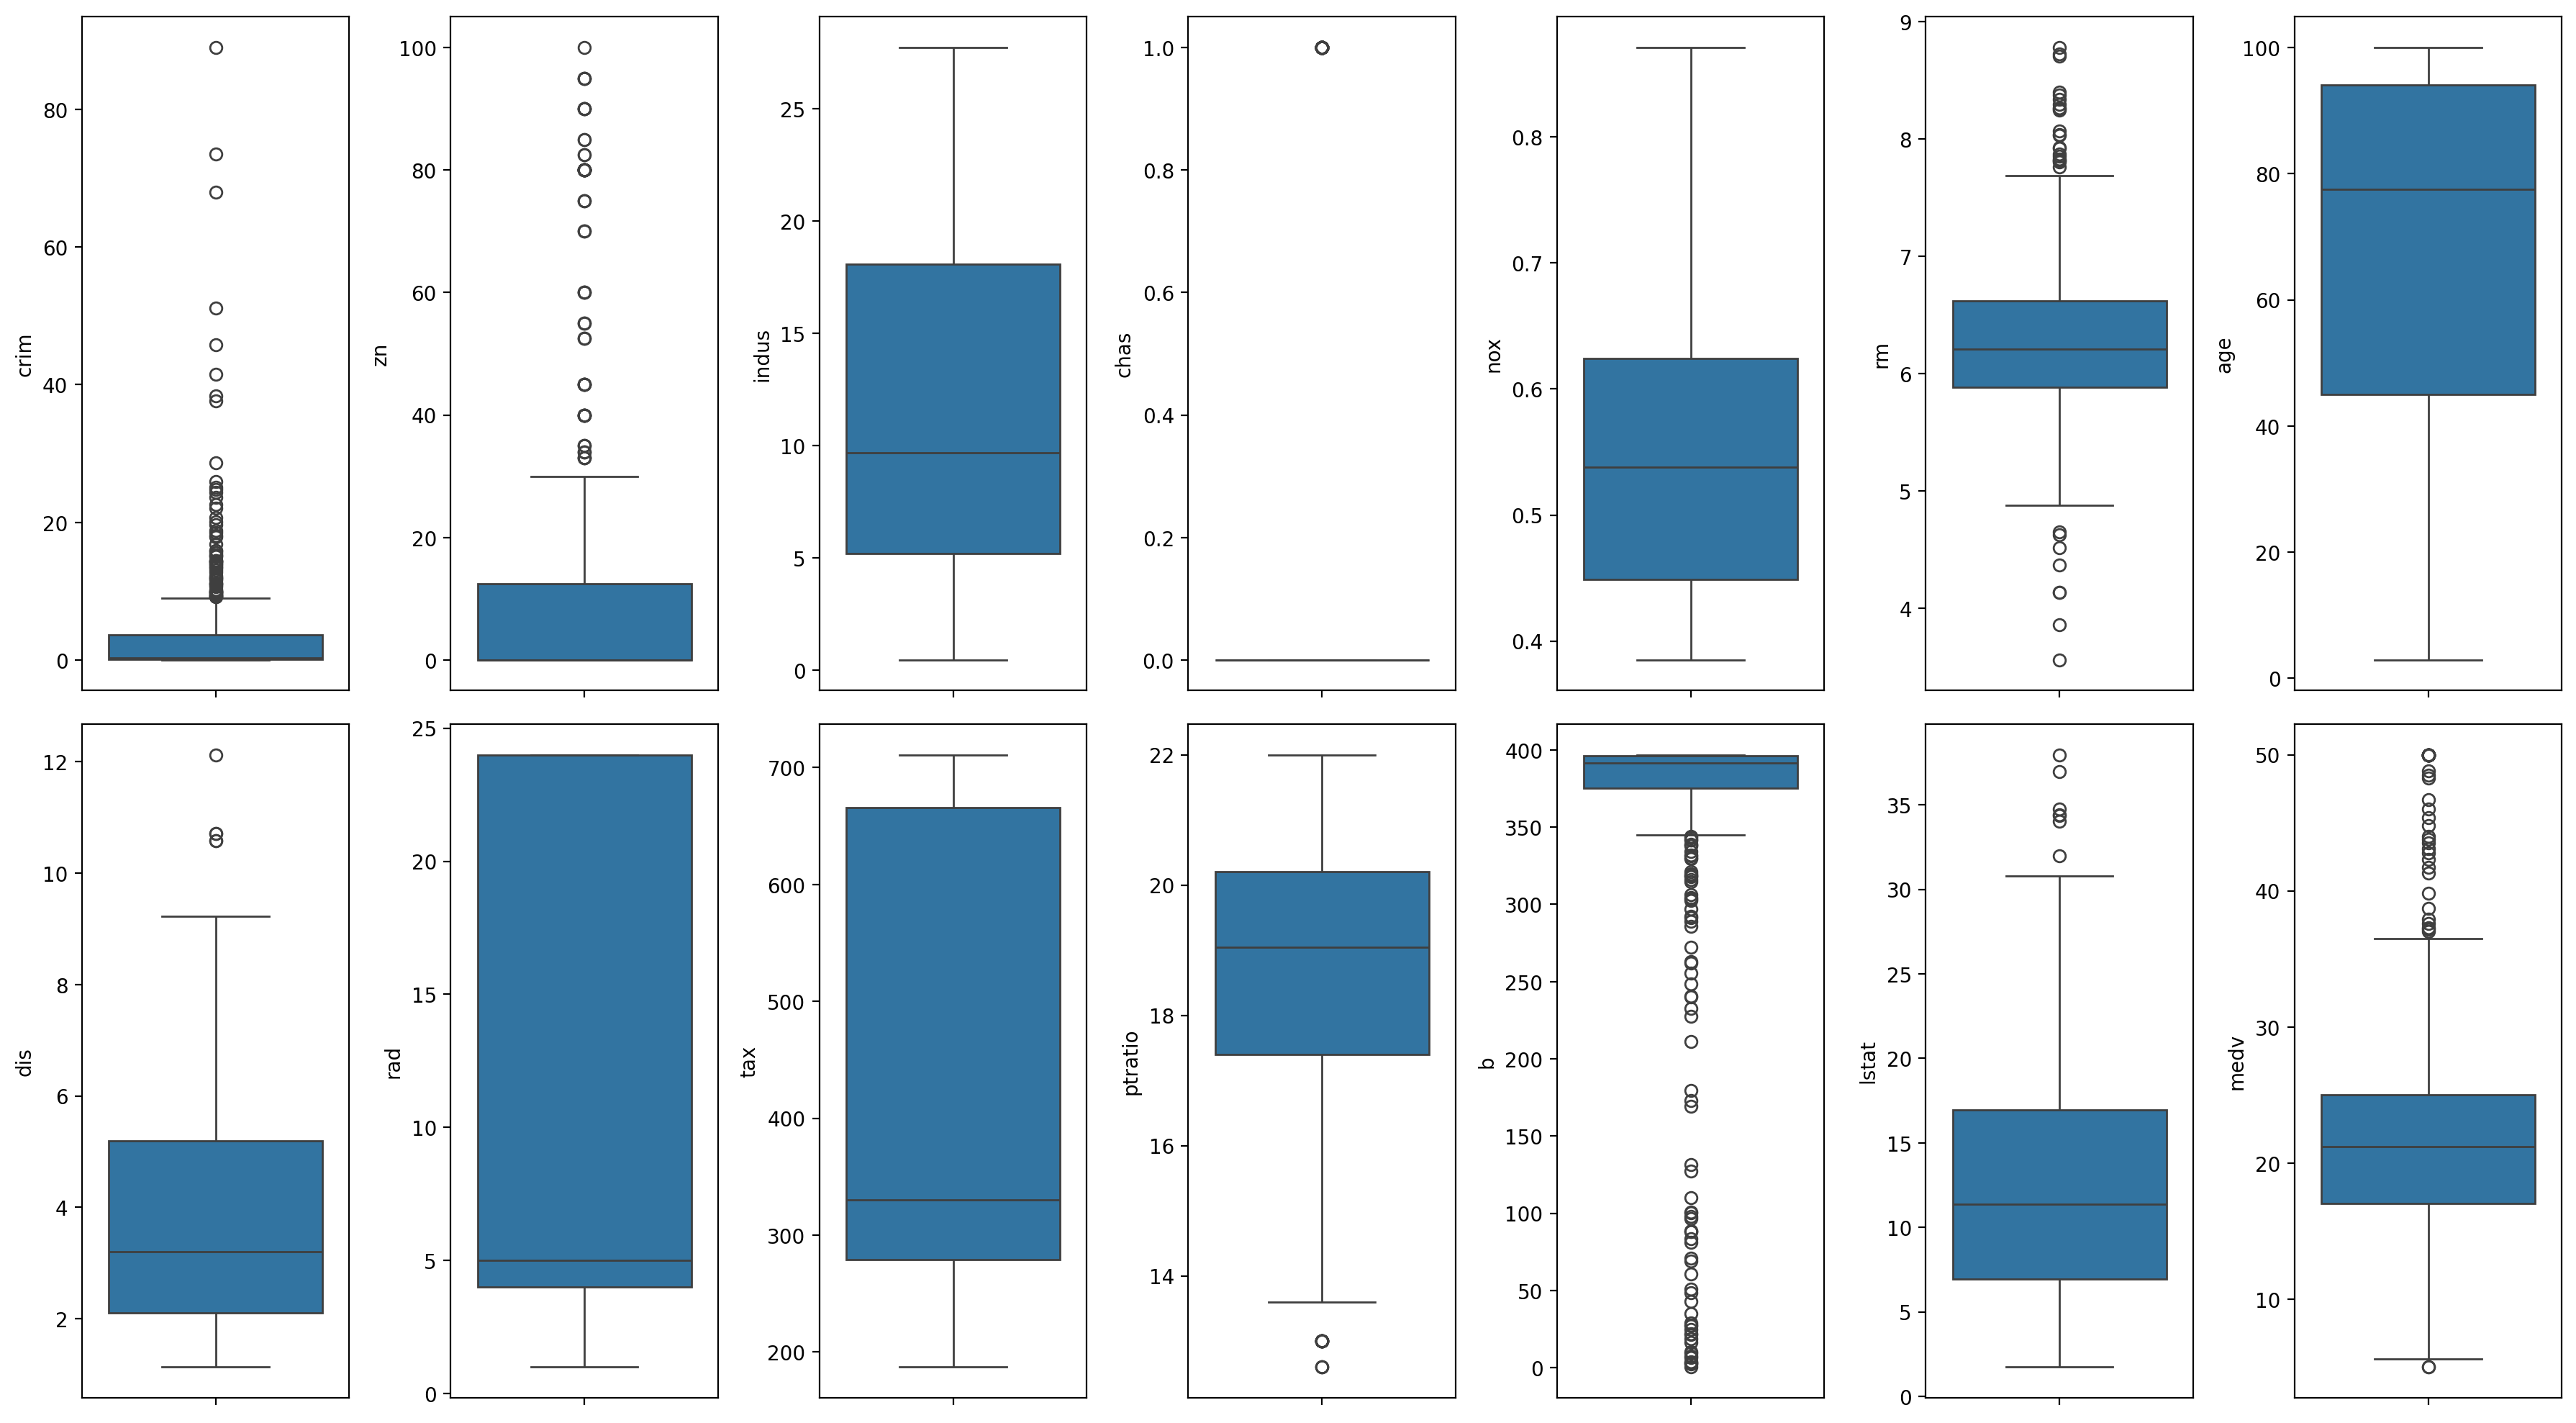

In [8]:
fig , ax = plt.subplots(ncols = 7 , nrows = 2 , figsize = (18,10))

ax = ax.flatten()
index = 0
for col,value in df.items() :
    sns.boxplot(y = col , data = df , ax=ax[index])
    index+=1
plt.tight_layout()

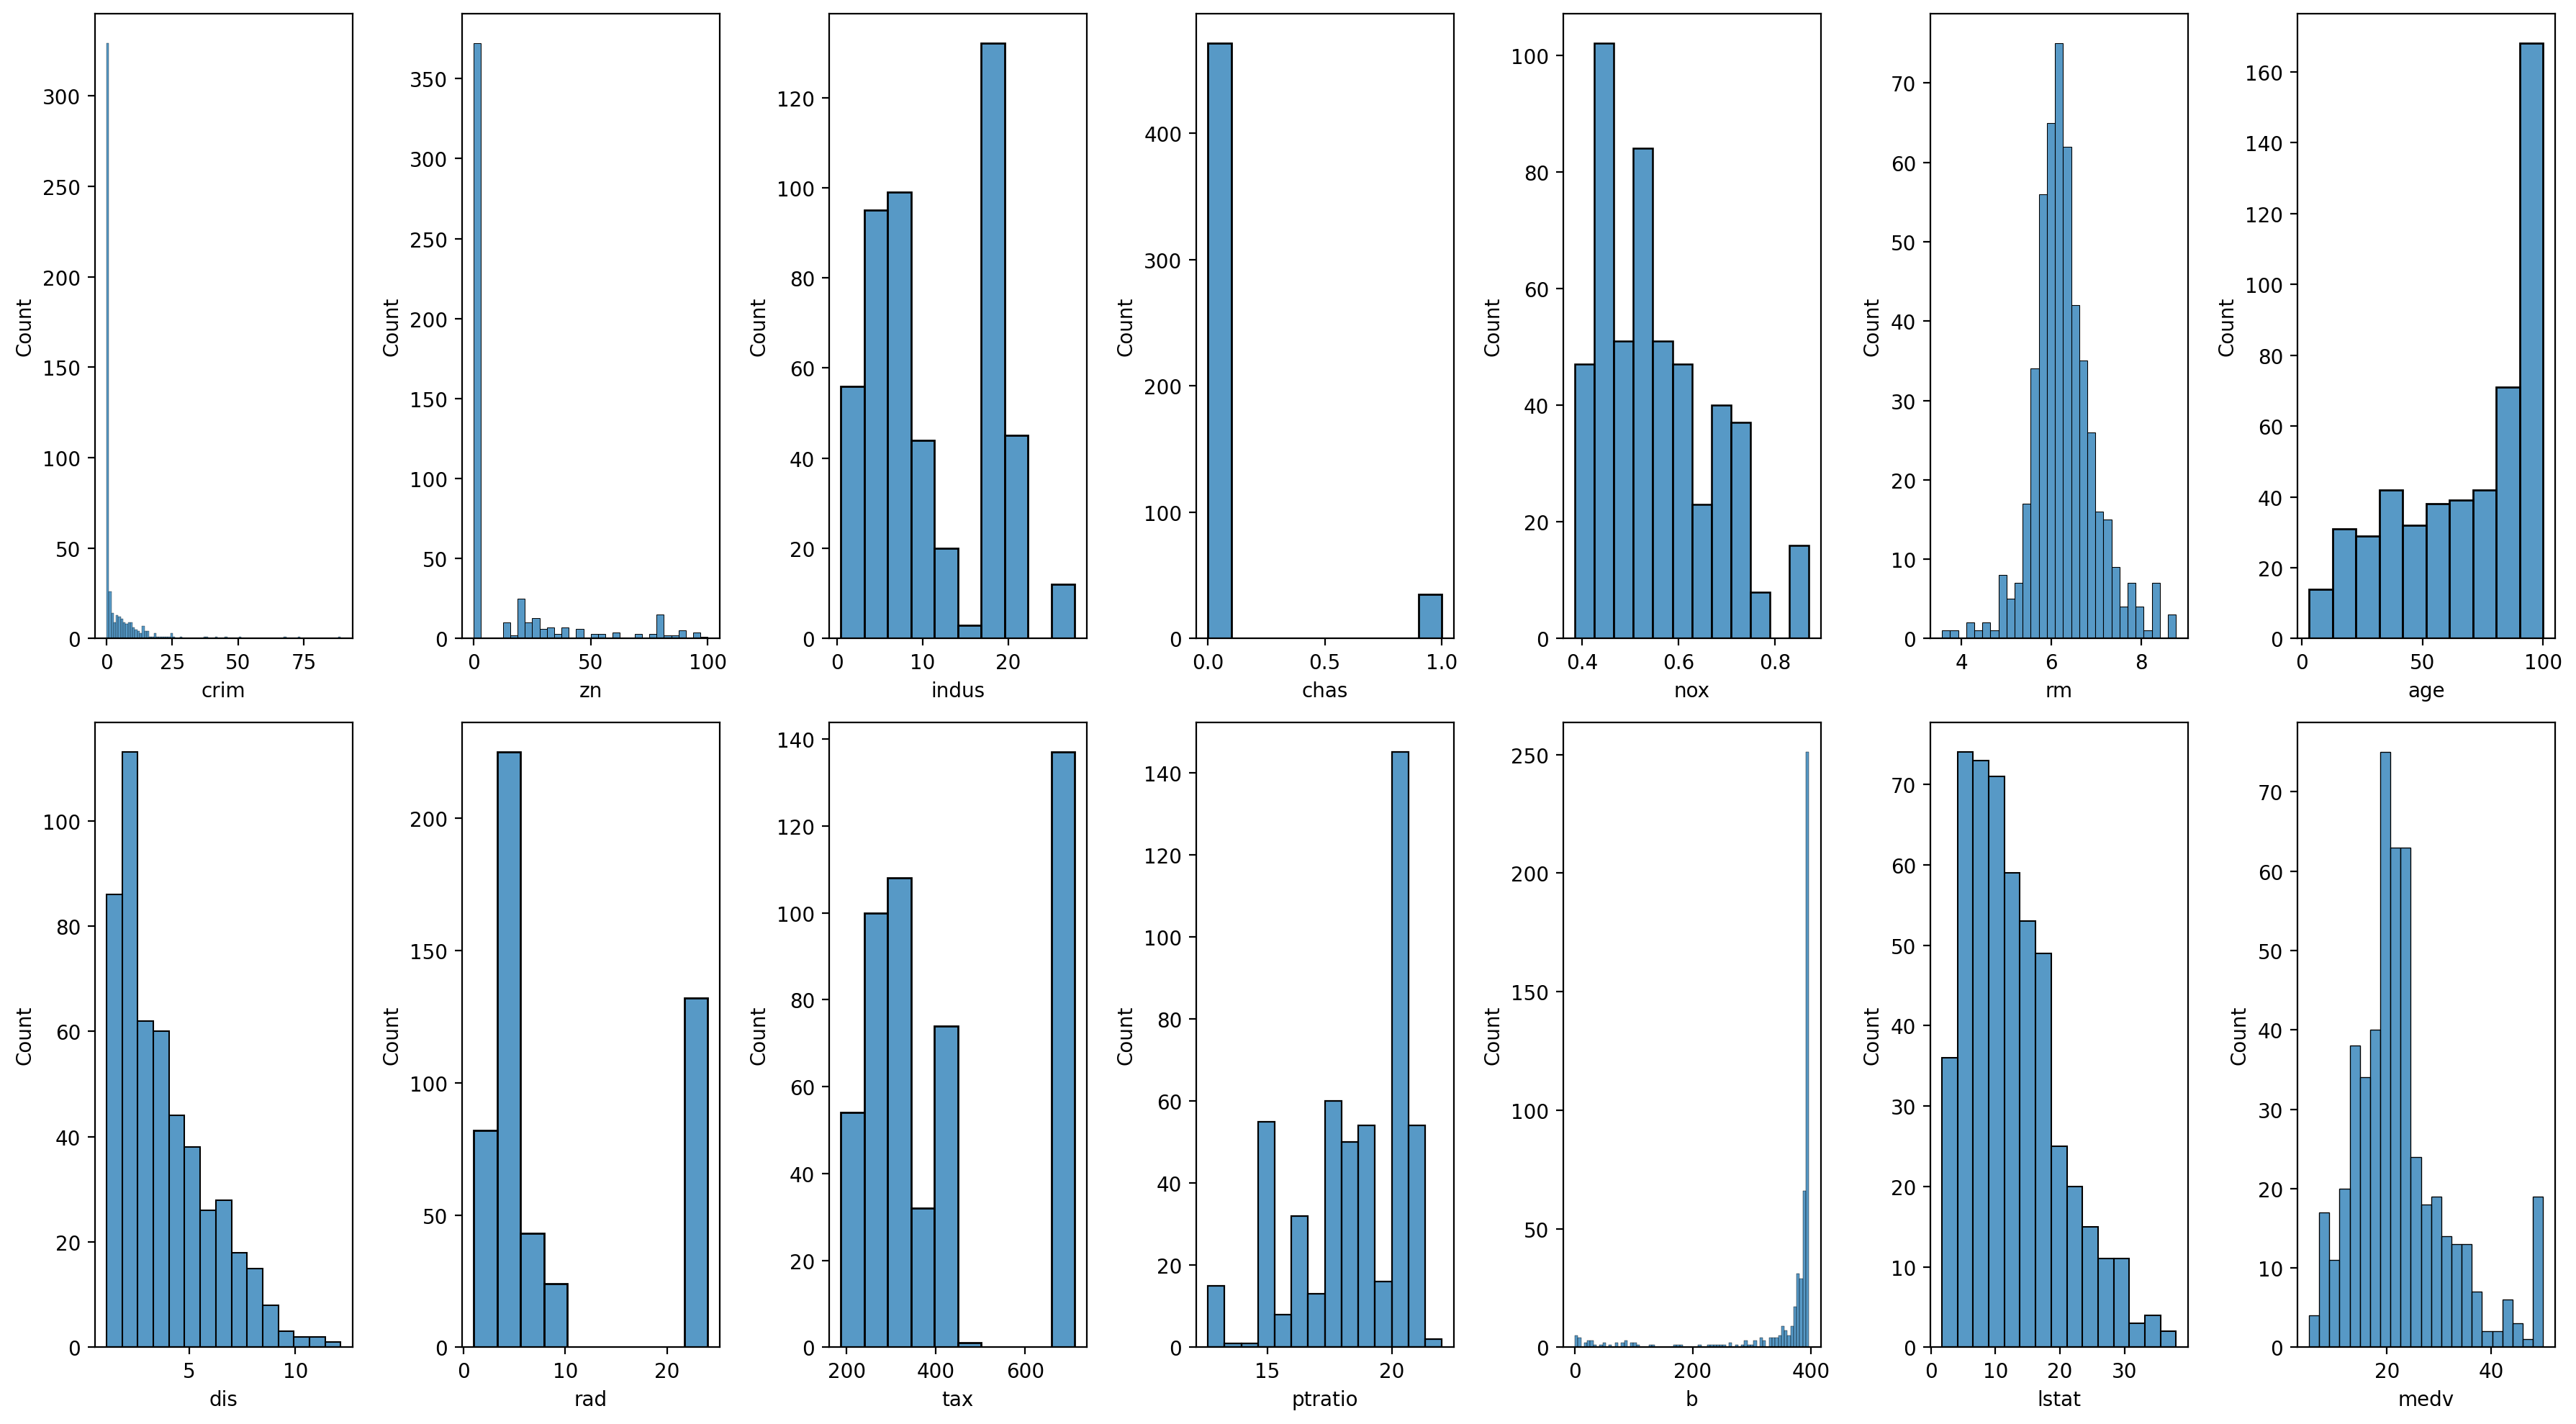

In [9]:
fig , ax = plt.subplots(ncols = 7 , nrows = 2 , figsize = (18,10))

ax = ax.flatten()
index = 0
for col,value in df.items() :
    sns.histplot(x=value , ax=ax[index])
    index+=1
plt.tight_layout()

In [10]:
# Min-Max Normalization ปรับช่วงข้อมูล ให้เป็นอยู่ในช่วง [0, 1]
cols =['crim','zn','indus','rm','age','dis','rad','tax','ptratio','b','lstat']
for i in cols :
    min_col = min(df[i])
    max_col = max(df[i])
    df[i] = (df[i] - min_col)/(max_col - min_col)


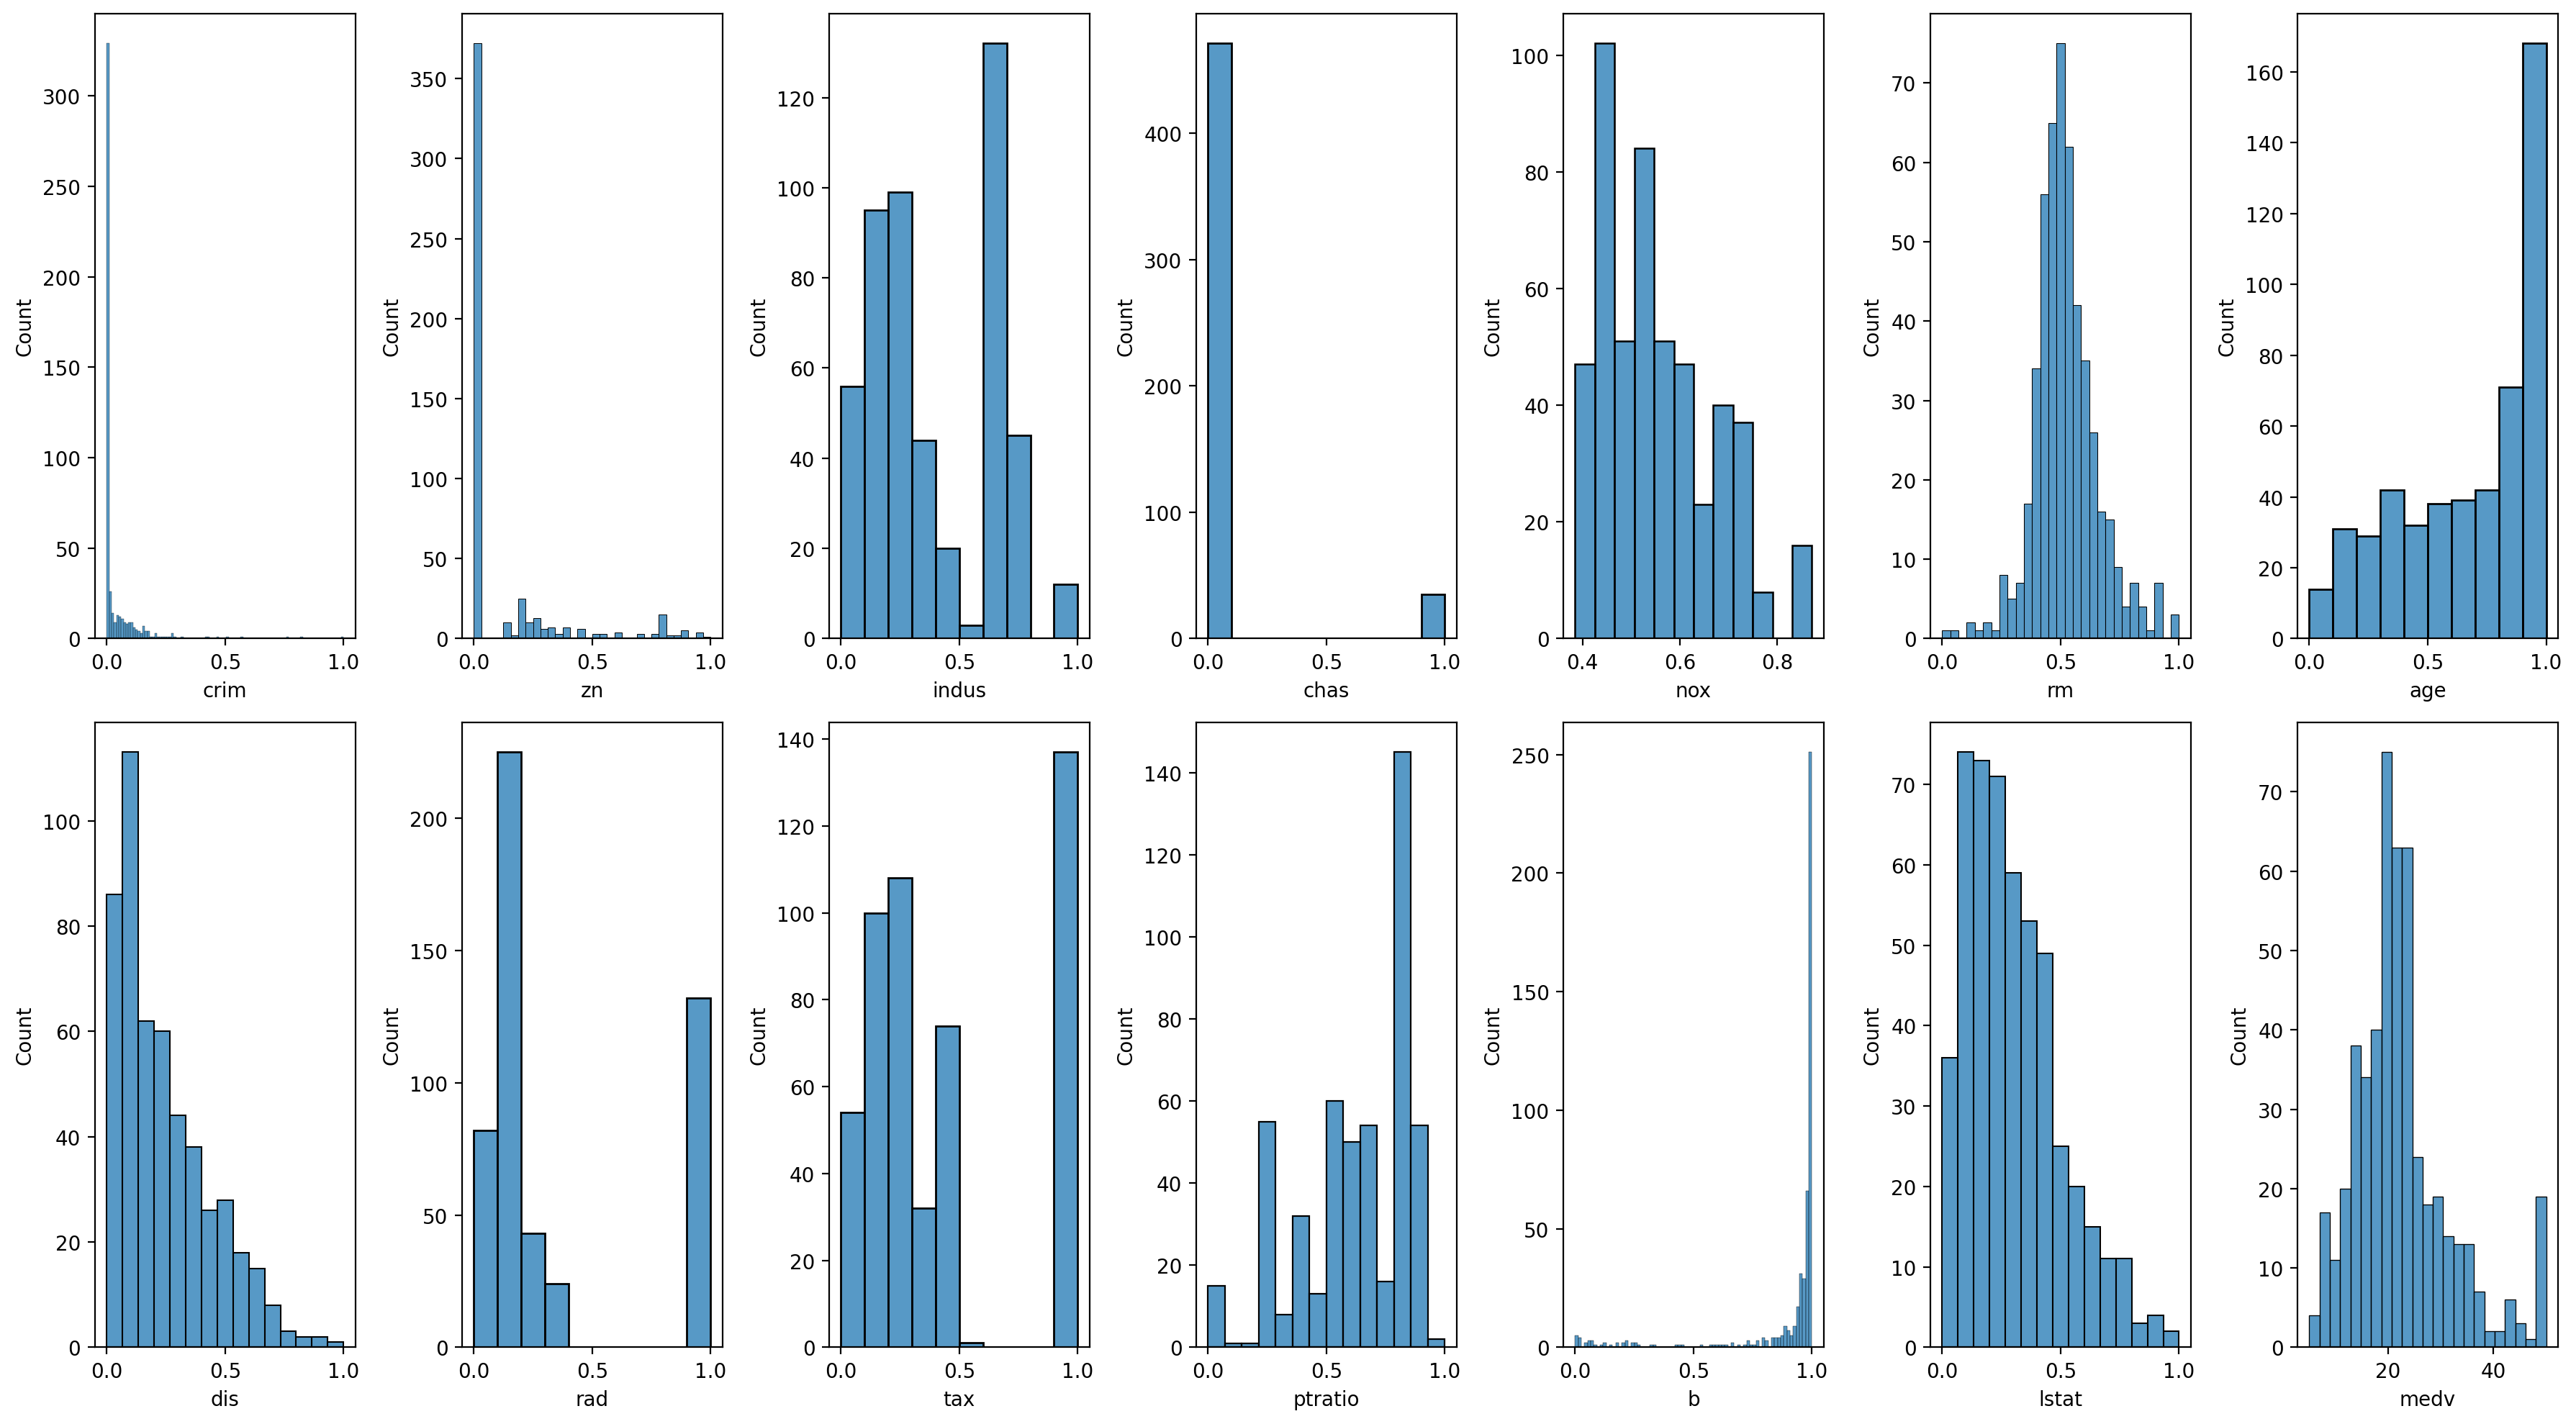

In [11]:
fig , ax = plt.subplots(ncols = 7 , nrows = 2 , figsize = (18,10))

ax = ax.flatten()
index = 0
for col,value in df.items() :
    sns.histplot(x=value , ax=ax[index])
    index+=1
plt.tight_layout()

<Axes: >

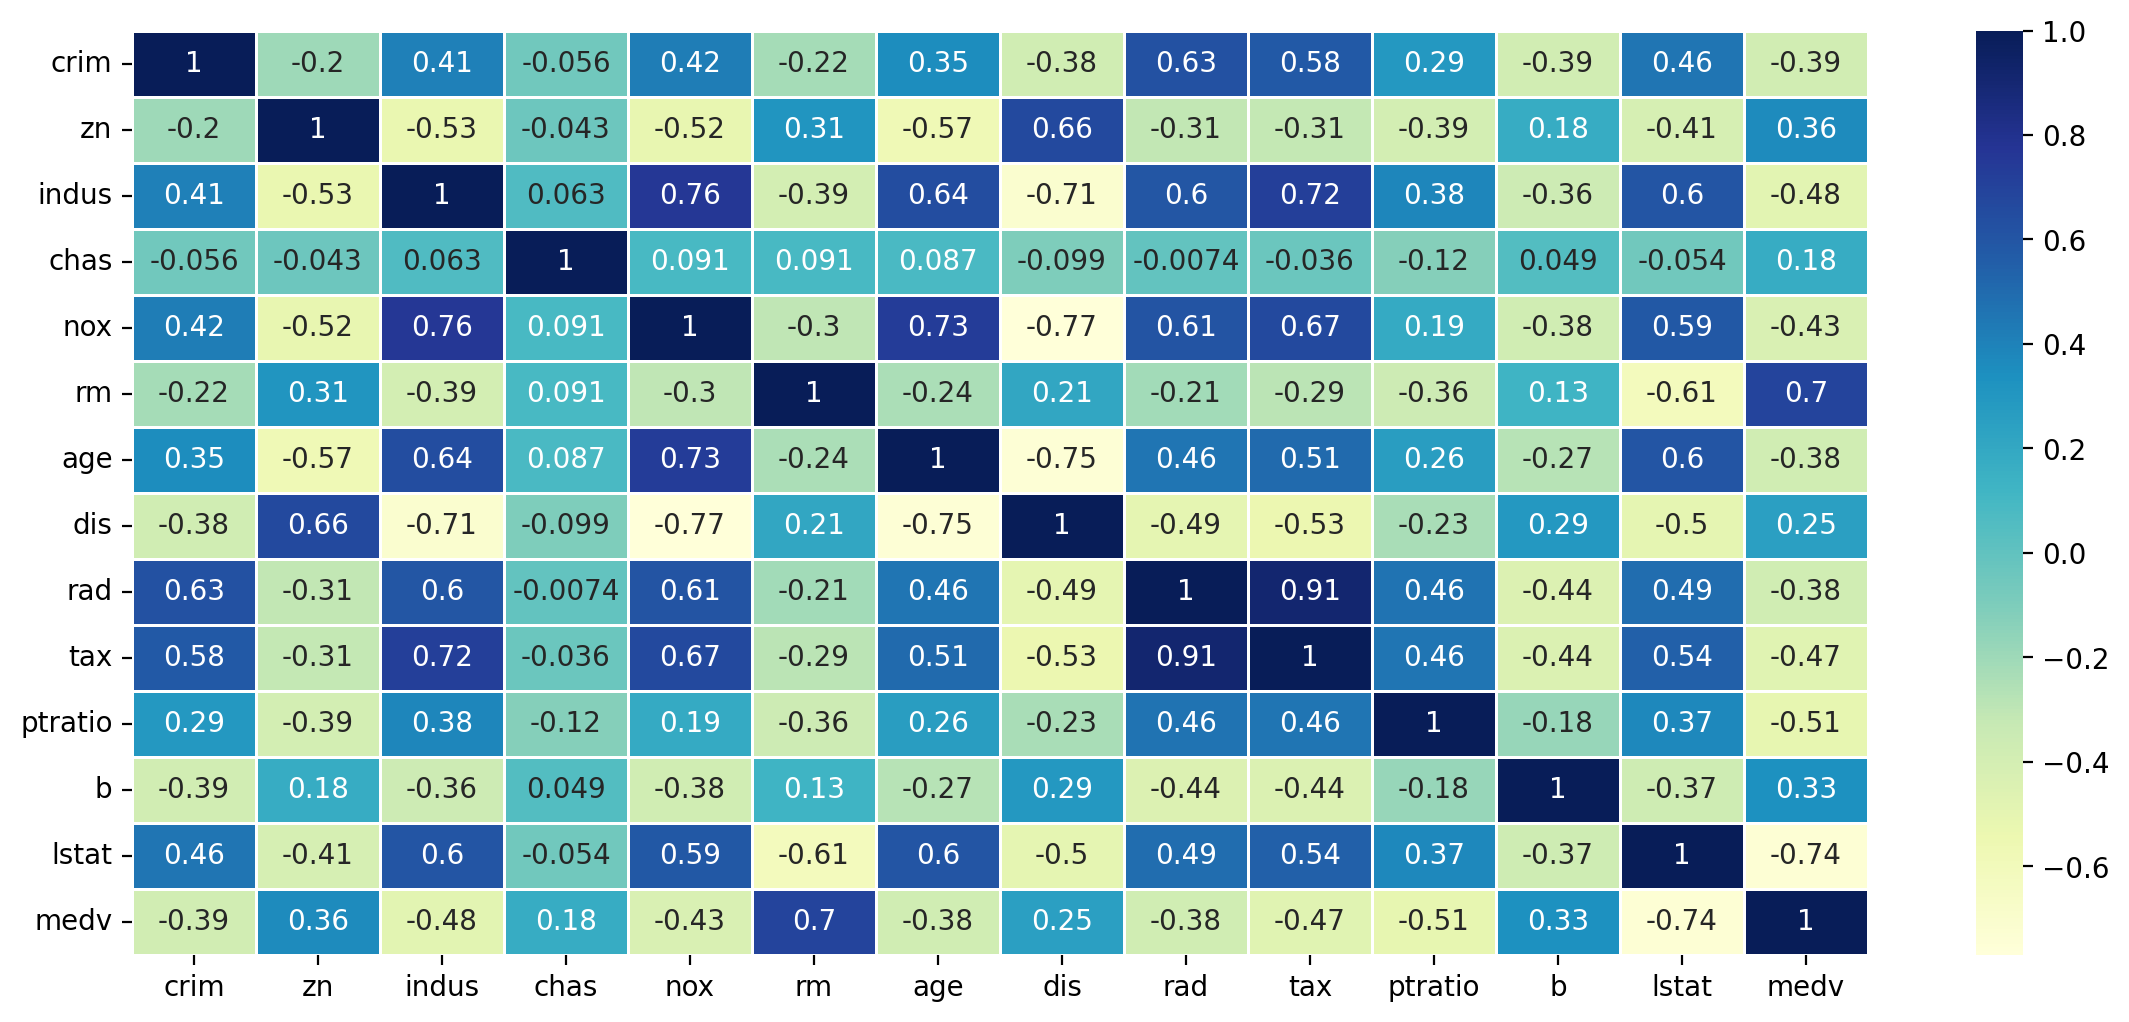

In [12]:
plt.figure(figsize = (14,6))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True , linewidth=.5 )

<Axes: xlabel='lstat', ylabel='medv'>

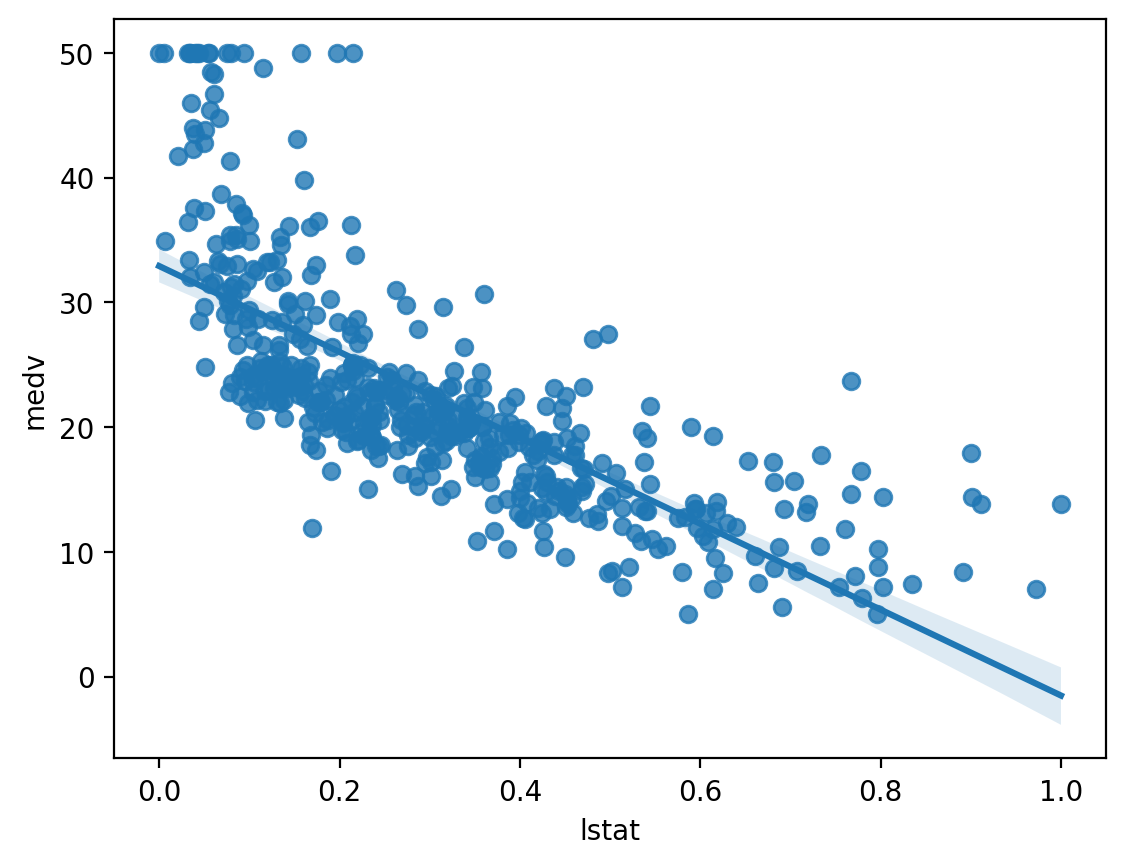

In [13]:
sns.regplot(x =df['lstat'] , y=df['medv'])

<Axes: xlabel='rm', ylabel='medv'>

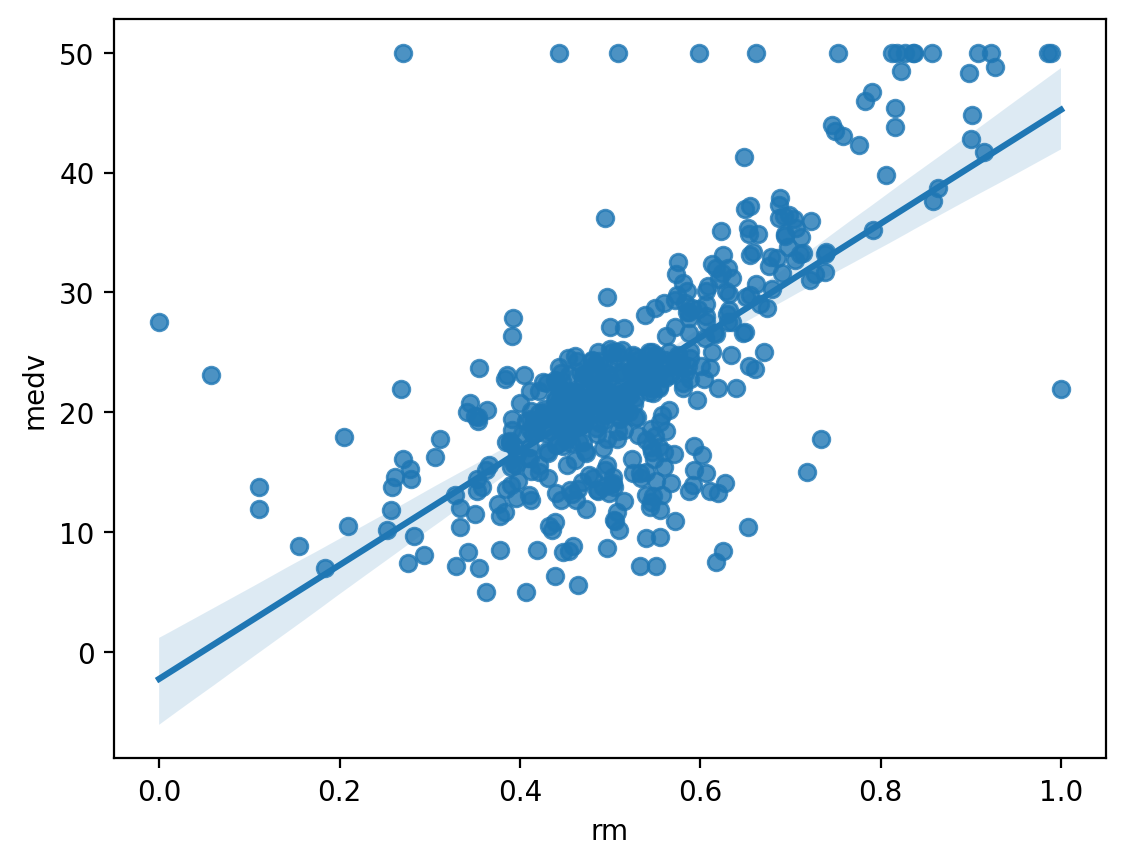

In [14]:
sns.regplot(x =df['rm'] , y=df['medv'])

In [15]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0,0.538,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0,0.469,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0,0.469,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0,0.458,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0,0.458,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0,0.573,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,22.4
502,0.000438,0.00,0.420455,0,0.573,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,20.6
503,0.000612,0.00,0.420455,0,0.573,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,23.9
504,0.001161,0.00,0.420455,0,0.573,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,22.0


In [16]:
# ML part LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X = df.drop(['medv'], axis = 1)
y = df['medv']

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [18]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000000,0.18,0.067815,0,0.538,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0,0.469,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0,0.469,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0,0.458,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0,0.458,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0,0.573,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0,0.573,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0,0.573,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0,0.573,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [19]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [20]:
# 1. Split data
train_size=0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

In [21]:
## 2.Train
model = LinearRegression() 
model.fit(X_train,y_train)

LinearRegression()

In [22]:
## 3. Score
model.score(X_train, y_train) # R-squared

0.7508856358979673

In [23]:
model.coef_  #slope (coefficients)

array([-10.05857199,   3.01104641,   1.10158605,   2.7844382 ,
       -17.20263339,  23.16628091,  -0.61137677, -15.92203067,
         6.03588392,  -5.57891601,  -8.60528866,   4.89829233,
       -18.43062842])

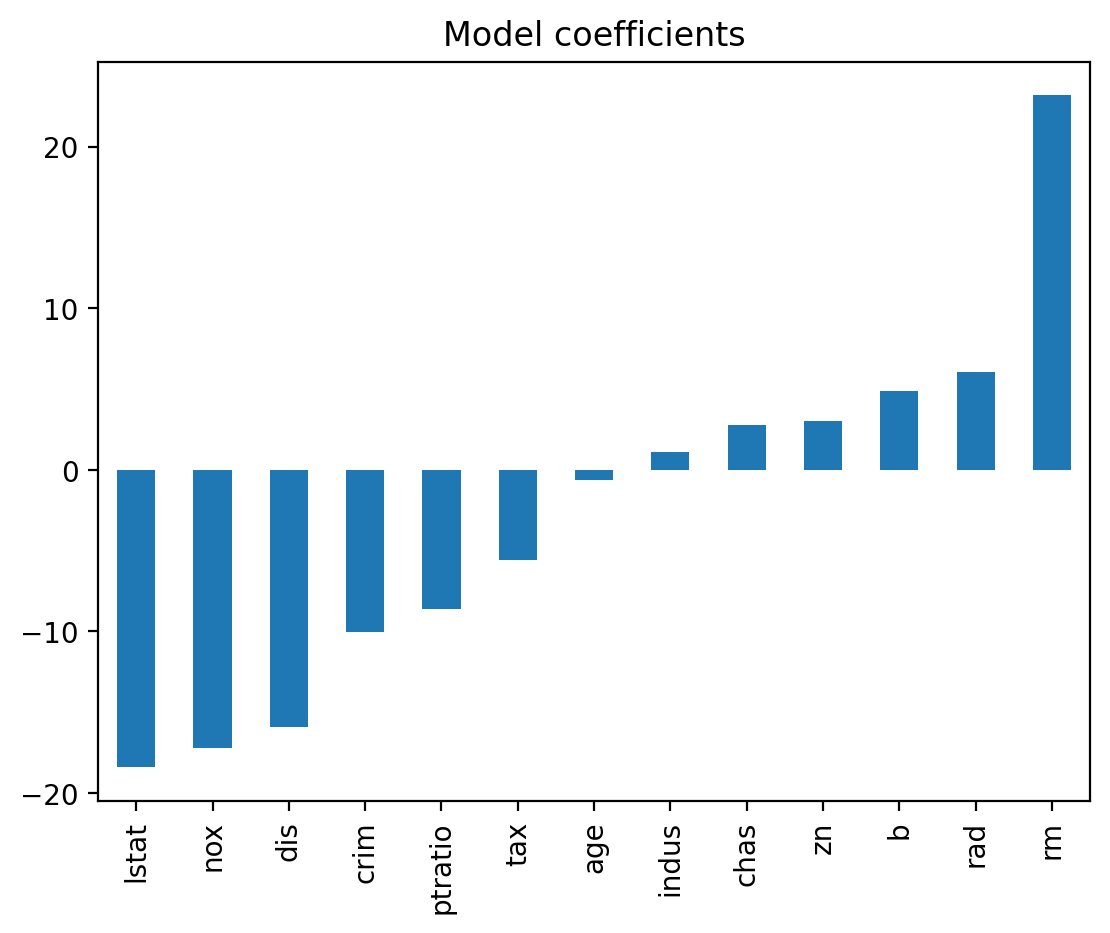

In [24]:
coef = pd.Series(model.coef_ ,X.columns).sort_values()
coef.plot(kind ='bar' ,title='Model coefficients');


In [25]:
model.intercept_  #Y-intercept

30.278391521658

In [26]:
predictions = model.predict(X_test)
predictions

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [27]:
print(len(predictions) , len(y_test))

102 102


In [28]:
## 4. Evaluate
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'   MAE   : {metrics.mean_absolute_error(predictions , y_test)}')
print(f'   MSE   : {metrics.mean_squared_error(predictions , y_test)}')
print(f'R2 score : {metrics.r2_score(predictions , y_test)}')
print(f'   RMSE  : {np.sqrt(metrics.mean_squared_error(predictions , y_test))}')

   MAE   : 3.1890919658878487
   MSE   : 24.291119474973534
R2 score : 0.6333247469014349
   RMSE  : 4.928602182665338


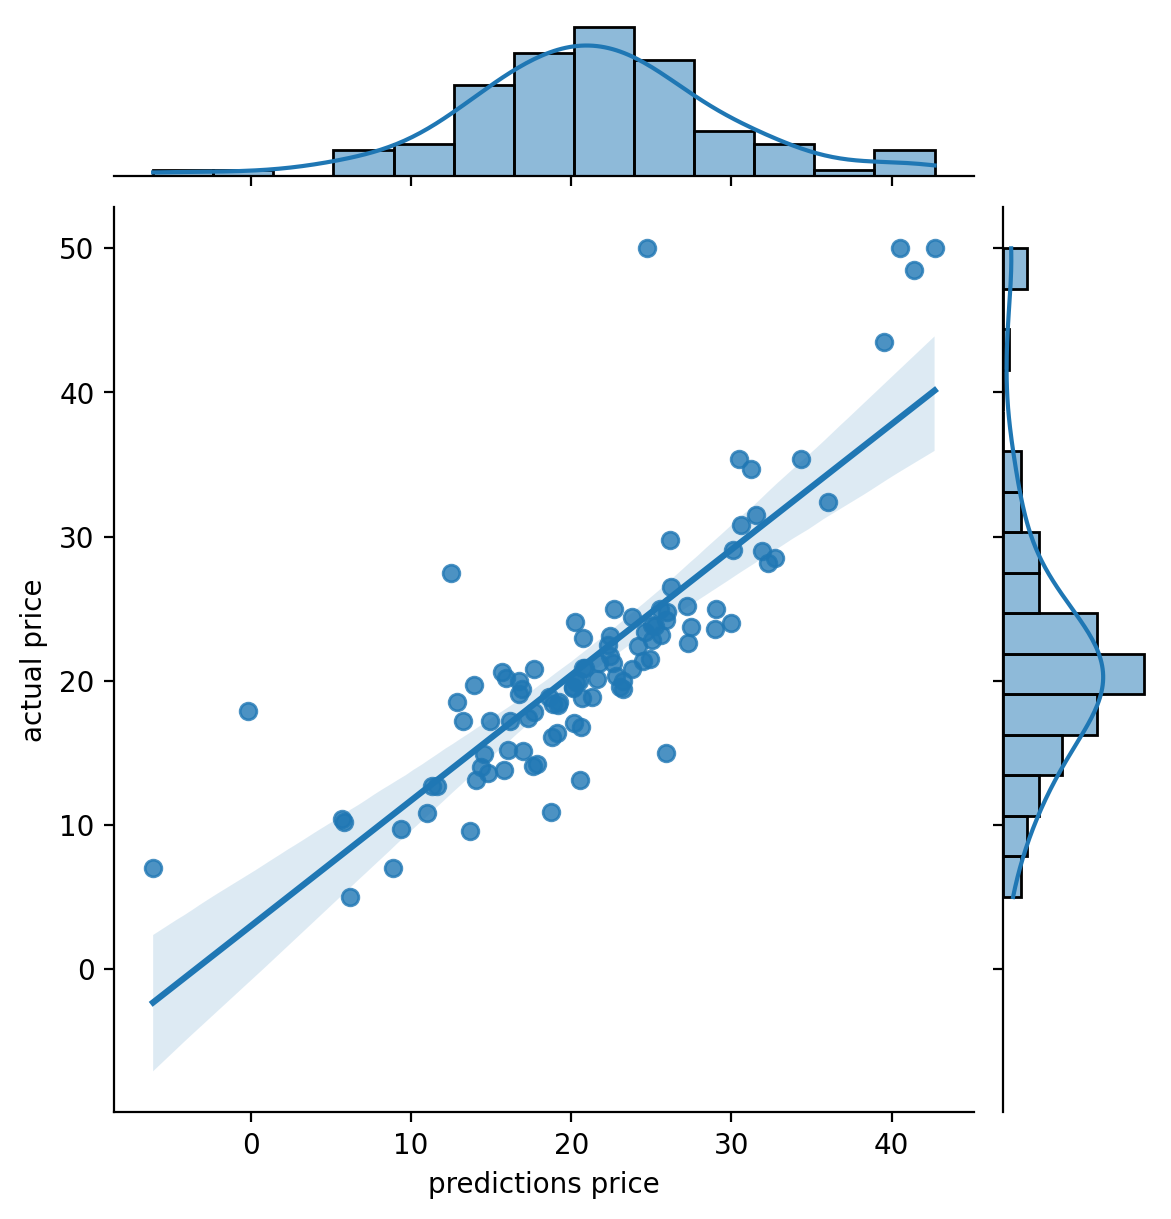

In [29]:
sns.jointplot(x = predictions, y = y_test, kind = 'reg' )
plt.ylabel('actual price')
plt.xlabel('predictions price')
plt.show()

In [30]:
# ML part RandomForest
from sklearn.ensemble import RandomForestRegressor
# 1. Split data
train_size=0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

In [31]:
## 2. Train
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train , y_train)

RandomForestRegressor()

In [32]:
# 3. Score
forest.score(X_train , y_train)

0.9781837972730044

In [33]:
forest.feature_importances_ 

array([0.0360852 , 0.00132063, 0.00800501, 0.00115067, 0.0152957 ,
       0.50323626, 0.01466221, 0.05473485, 0.00494269, 0.01613795,
       0.01705022, 0.01352353, 0.31385508])

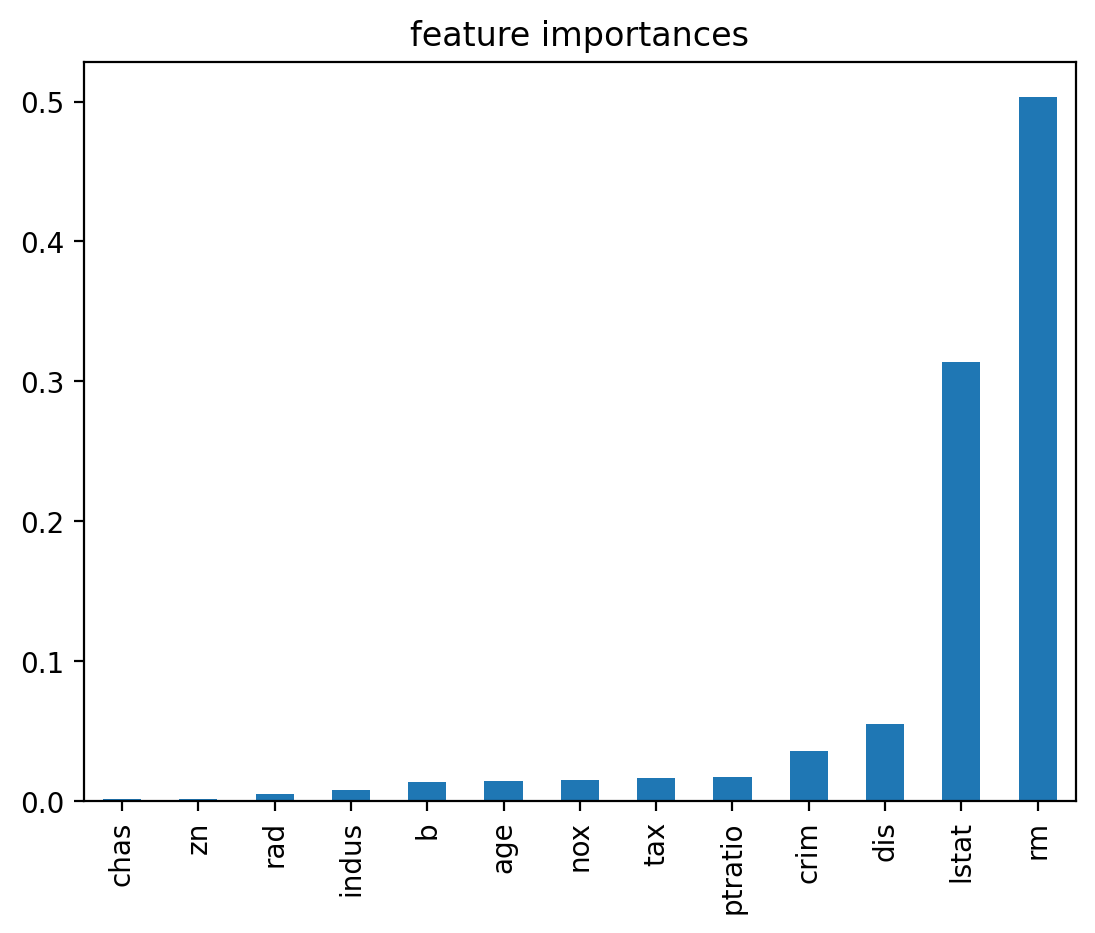

In [34]:
coef = pd.Series(forest.feature_importances_ ,X.columns).sort_values()
coef.plot(kind ='bar' ,title='feature importances');

In [35]:
forest_y_pred =  forest.predict(X_test)
forest_y_pred

array([22.878, 30.708, 17.096, 23.52 , 16.476, 21.131, 19.272, 15.463,
       21.334, 20.977, 20.16 , 19.851,  8.918, 21.542, 19.218, 26.277,
       19.027,  8.589, 45.773, 14.919, 24.561, 23.668, 14.447, 23.69 ,
       14.754, 14.877, 21.432, 13.967, 19.383, 20.995, 19.335, 23.24 ,
       30.809, 19.702, 14.587, 16.01 , 34.578, 19.204, 20.668, 24.315,
       19.22 , 29.495, 45.322, 19.133, 22.311, 14.024, 15.296, 24.541,
       18.483, 28.324, 21.442, 33.441, 16.212, 25.785, 45.387, 21.856,
       15.752, 32.131, 22.345, 21.305, 25.398, 34.508, 28.824, 18.643,
       26.817, 17.721, 14.474, 22.982, 28.379, 15.757, 20.692, 26.74 ,
       10.073, 21.272, 21.825,  7.049, 19.989, 45.82 , 12.028, 12.65 ,
       21.392, 13.293, 20.17 ,  9.11 , 20.525, 26.79 , 15.721, 23.321,
       23.41 , 17.919, 21.624,  8.068, 19.686, 18.912, 23.177, 19.875,
       40.049, 12.245, 12.518, 13.208, 20.158, 23.514])

In [36]:
# 4. Evaluate
print(f'   MAE   : {metrics.mean_absolute_error(forest_y_pred , y_test)}')
print(f'   MSE   : {metrics.mean_squared_error(forest_y_pred , y_test)}')
print(f'R2 score : {metrics.r2_score(forest_y_pred , y_test)}')
print(f'   RMSE  : {np.sqrt(metrics.mean_squared_error(forest_y_pred , y_test))}')

   MAE   : 2.0865098039215697
   MSE   : 8.624699372549022
R2 score : 0.8556572878850704
   RMSE  : 2.9367838484554873


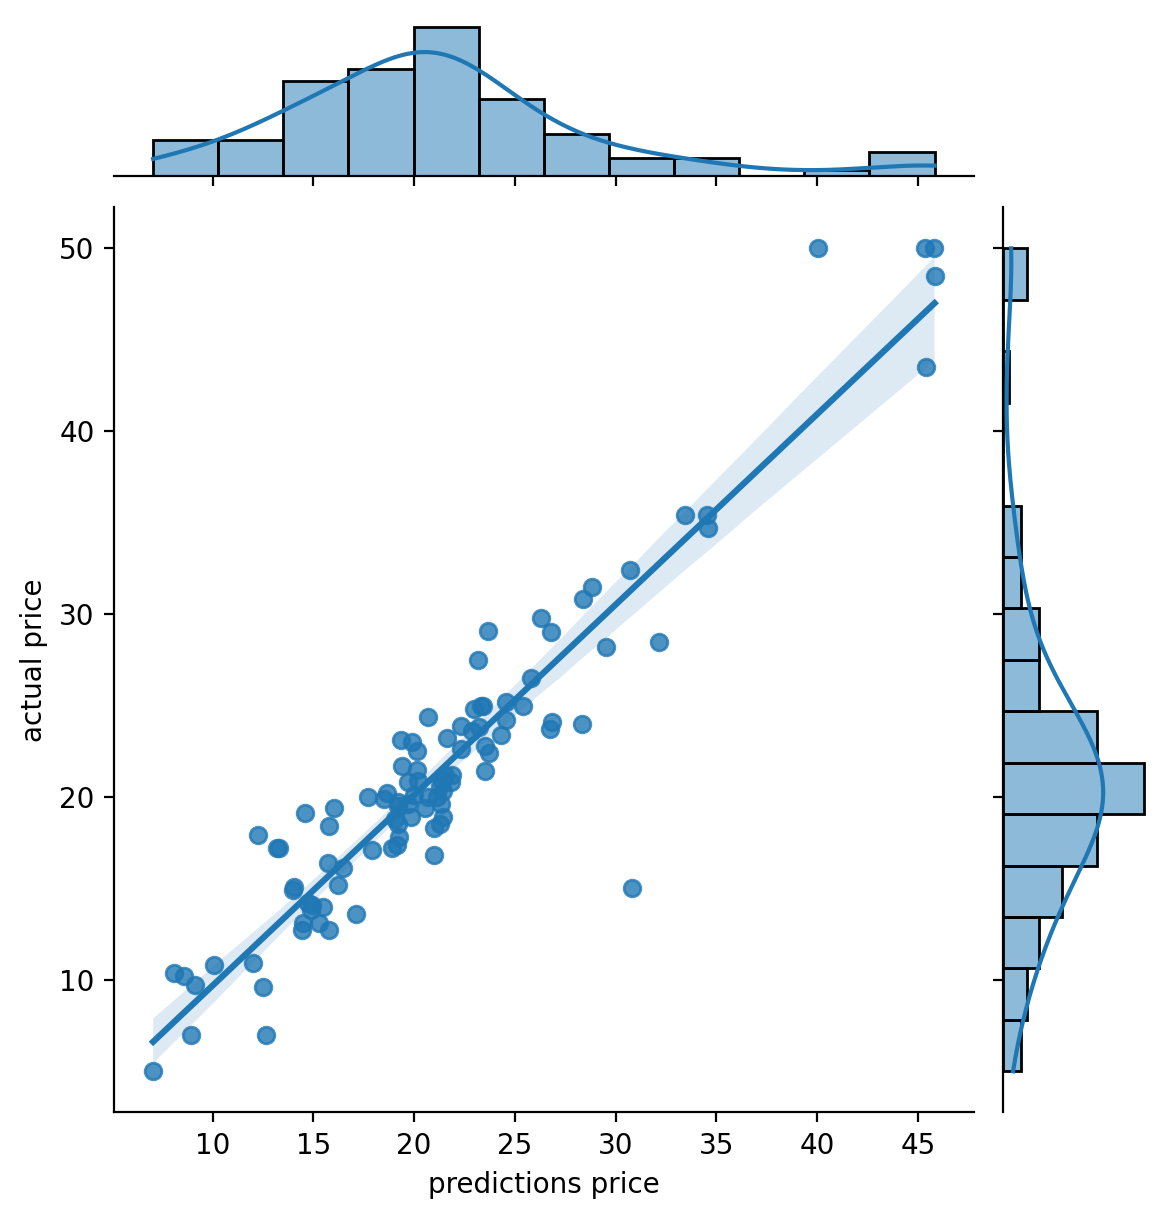

In [37]:
sns.jointplot(x = forest_y_pred, y = y_test, kind = 'reg' )
plt.ylabel('actual price')
plt.xlabel('predictions price')
plt.show()